# IFAC Correlation Plot

Correlate cycle time and dirt moved for different control regimes.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# Copy data from 'manual_trials.xlsx', (there's a better way to do this)
mop1_cycle_times = [15.87, 10.62, 12.72, 14.61, 13.14,
                    15.11, 11.93, 17.17, 12.72, 21.26,
                    16.187, 13.38, 17.86, 12.77, 14.99]
mop2_cycle_times = [28.716, 26.446, 32.886, 34.316, 30.716,
                    31.436, 19.956, 32.356, 28.906, 32.116,
                    29.47, 26.176, 38.836, 31.516, 34.016]
mop3_cycle_times = [32.08, 19.58, 28.73, 16.99, 29.27,
                    37.369, 21.779, 31.829, 27.399, 20.869,
                    21.904, 18.074, 19.884, 22.074]

bop1_cycle_times = [18.24, 16.41, 15.51, 16.19, 16.68,
                    15.83, 15.01, 17.04, 22.16, 15.47]
bop2_cycle_times = [26.798, 20.898, 27.928, 24.088, 23.478,
                    20.235, 15.318, 20.508, 23.578, 23.368,
                    27.361, 20.928, 17.898, 18.228, 17.158]
bop3_cycle_times = [22.36, 19.13, 27.81, 26.38, 27.07,
                    17.667, 20.297, 39.697, 19.487, 27.937,
                    23.45, 16.68, 24.63, 37.02, 25.72]

mop1_dirt = [1.5, 1, 2, 1.5, 1.5,
            1.5, 1.5, 2, 1.5, 1,
            2.25, 1.25, 1.5, 1.5, 1]
mop2_dirt = [1.9, 1.3, 1.5, 1.3, 1.2,
            1.8, 1.2, 1, 1.7, 1.1,
            1, 1.7, 1.5, 1.3, 1.6]
mop3_dirt = [0.3, 0.7, 0.3, 0.3, 0.5,
            1, 0.3, 1.4, 0.5, 0.8,
            0.3, 1, 0.5, 0.7]
bop1_dirt = [1.7, 1.7, 2, 1, 1.7,
            2, 1.5, 1.5, 1, 1.5]
bop2_dirt = [1, 1.4, 0.9, 1.7, 2,
            1.6, 1.5, 0.9, 1.5, 1.7,
            1.5, 1.5, 1, 1, 1]
bop3_dirt = [0.9, 1.3, 0.8, 0.7, 0.4,
            1.5, 0.5, 0.2, 1, 0.2,
            0.8, 1, 1, 0.4, 0.2]
cyc_times = [mop1_cycle_times, bop1_cycle_times,
             mop2_cycle_times, bop2_cycle_times,
             mop3_cycle_times, bop3_cycle_times]
dirt_moved = [mop1_dirt, bop1_dirt,
             mop2_dirt, bop2_dirt,
             mop3_dirt, bop3_dirt]

# cyc_times = [mop1_cycle_times + mop2_cycle_times + mop3_cycle_times, 
#              bop1_cycle_times + bop2_cycle_times + bop3_cycle_times]
# dirt_moved = [mop1_dirt + mop2_dirt + mop3_dirt,
#               bop1_dirt + bop2_dirt + bop3_dirt]

In [43]:
f = open('harshal_data.csv', 'wb')
for item in cyc_times:
        for pt in item:
            f.write(str(pt)+'\n')
        f.write('\n')
f.write('end cycle times \n')
for item in dirt_moved:
        for pt in item:
            f.write(str(pt)+'\n')
        f.write('\n')
f.write('end dirt moved \n')
f.close()

In [27]:
def plotData(x, y, color, labl):
#     x,y = zip(*inData)

#     xMap = assignIDs(x)
#     xAsInts = np.array([xMap[i] for i in x])

    pearR = np.corrcoef(x,y)[1,0]
    # least squares from:
    # http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
    A = np.vstack([x,np.ones(len(x))]).T
    m,c = np.linalg.lstsq(A,np.array(y))[0]

    plt.scatter(x,y,label=labl,color=color)
    plt.plot(x,np.array(x)*m+c,color=color,
             label="Fit, r = %.2f"%pearR)
#     plt.xticks(xMap.values(),xMap.keys())
    plt.legend(loc=3)

## Correlation for all operators aggregated

Aggregate all manual and blended trials and seek correlation between cycle time and dirt moved.

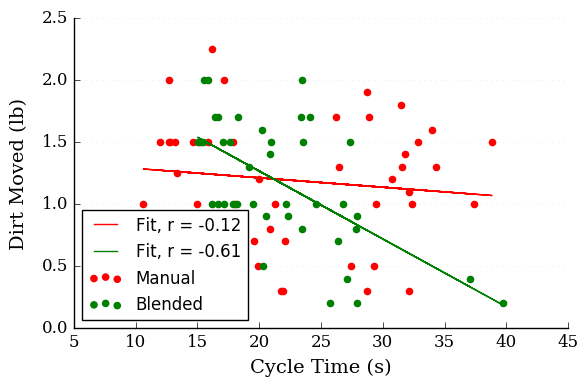

In [28]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Cycle Time (s)', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Dirt Moved (lb)', family='serif', fontsize=14, labelpad=10)

man_colors = ('r', 'g', 'y')
ble_colors = ('b', 'k', 'm')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)

plotData(cyc_times[0], dirt_moved[0], man_colors[0], 'Manual')
plotData(cyc_times[1], dirt_moved[1], man_colors[1], 'Blended')

plt.tight_layout()
# plt.savefig('box_plot_eff.pdf', dpi=600)
plt.show()



## Each operator separate

Correlation plots for each operator.

### Operator 1

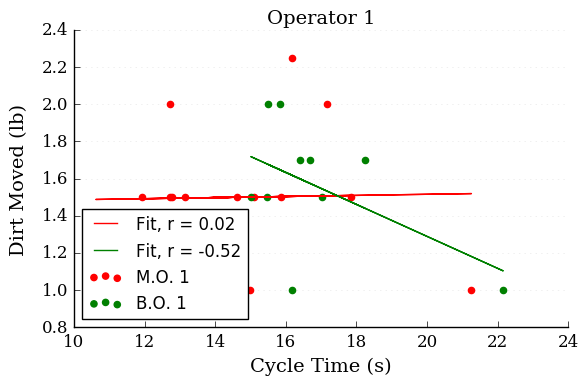

In [37]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Cycle Time (s)', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Dirt Moved (lb)', family='serif', fontsize=14, labelpad=10)
plt.title('Operator 1', family='serif', fontsize=14)

man_colors = ('r', 'g', 'y')
ble_colors = ('b', 'k', 'm')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)

plotData(mop1_cycle_times, mop1_dirt, man_colors[0], 'M.O. 1')
plotData(bop1_cycle_times, bop1_dirt, man_colors[1], 'B.O. 1')

plt.tight_layout()
# plt.savefig('box_plot_eff.pdf', dpi=600)
plt.show()


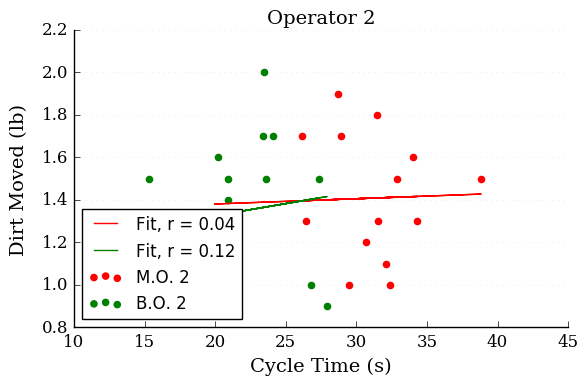

In [38]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Cycle Time (s)', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Dirt Moved (lb)', family='serif', fontsize=14, labelpad=10)
plt.title('Operator 2', family='serif', fontsize=14)

man_colors = ('r', 'g', 'y')
ble_colors = ('b', 'k', 'm')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)

plotData(mop2_cycle_times, mop2_dirt, man_colors[0], 'M.O. 2')
plotData(bop2_cycle_times, bop2_dirt, man_colors[1], 'B.O. 2')

plt.tight_layout()
# plt.savefig('box_plot_eff.pdf', dpi=600)
plt.show()


# Operator 3

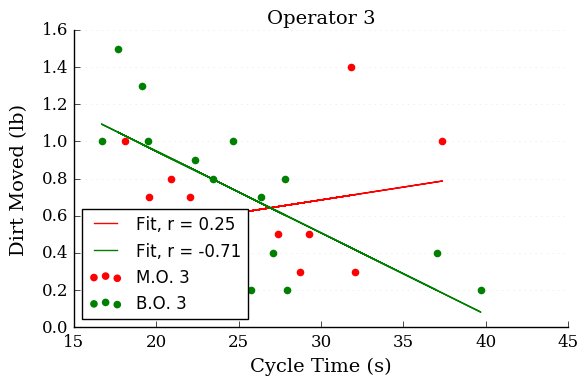

In [39]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Cycle Time (s)', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Dirt Moved (lb)', family='serif', fontsize=14, labelpad=10)
plt.title('Operator 3', family='serif', fontsize=14)

man_colors = ('r', 'g', 'y')
ble_colors = ('b', 'k', 'm')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)

plotData(mop3_cycle_times, mop3_dirt, man_colors[0], 'M.O. 3')
plotData(bop3_cycle_times, bop3_dirt, man_colors[1], 'B.O. 3')

plt.tight_layout()
# plt.savefig('box_plot_eff.pdf', dpi=600)
plt.show()
